In [1]:
import json

with open("osg_astar_mice_results.json") as f:
    data = json.load(f)

for strategy, programs in data["strategies"].items():
    print(f"\n{'=' * 70}")
    print(f"  {strategy}")
    print(f"{'=' * 70}")
    print(f"  {'#':<4} {'Latency':>10} {'Inv F1':>10} {'Not-Inv F1':>12}  Program")
    print(f"  {'-'*4} {'-'*10} {'-'*10} {'-'*12}  {'-'*30}")
    for i, p in enumerate(programs):
        print(
            f"  {i:<4} {p['latency']:>9.1f}s"
            f" {p['investigation_f1']:>10.4f}"
            f" {p['not_investigation_f1']:>12.4f}"
            f"  {p['program']}"
        )


  BoundedAStar(max_depth=5)
  #       Latency     Inv F1   Not-Inv F1  Program
  ---- ---------- ---------- ------------  ------------------------------
  0        590.3s     0.6181       0.8402  (output (running_avg_last10 (affine_min_res_nose_dist)))
  1        590.3s     0.2050       0.7827  (output (running_avg_last10 (affine_angle_between)))
  2        590.3s     0.0000       0.8636  (output (running_avg_last10 (affine_res_angle_head_body)))
  3        590.3s     0.0730       0.8641  (output (running_avg_last10 (affine_area_ellipse_ratio)))
  4        595.0s     0.0055       0.8625  (output (running_avg_last10 (add (affine_acceleration) (affine_axis_ratio))))
  5        595.0s     0.2788       0.5037  (output (running_avg_last10 (add (affine_acceleration) (affine_tangential_velocity))))
  6        595.0s     0.3407       0.6596  (output (running_avg_last10 (add (affine_acceleration) (affine_speed))))
  7        595.0s     0.0159       0.8586  (output (running_avg_last10 (add (aff

In [2]:
print(f"\n{'=' * 70}")
print("  Summary")
print(f"{'=' * 70}")
print(f"  {'Strategy':<30} {'First':>8} {'Last':>8} {'Best Inv':>10} {'Best NI':>10} {'Mean Inv':>10} {'Mean NI':>10}")
print(f"  {'-'*30} {'-'*8} {'-'*8} {'-'*10} {'-'*10} {'-'*10} {'-'*10}")
for strategy, programs in data["strategies"].items():
    lats = [p["latency"] for p in programs]
    inv = [p["investigation_f1"] for p in programs]
    ni = [p["not_investigation_f1"] for p in programs]
    print(
        f"  {strategy:<30}"
        f" {min(lats):>7.1f}s"
        f" {max(lats):>7.1f}s"
        f" {max(inv):>10.4f}"
        f" {max(ni):>10.4f}"
        f" {sum(inv)/len(inv):>10.4f}"
        f" {sum(ni)/len(ni):>10.4f}"
    )


  Summary
  Strategy                          First     Last   Best Inv    Best NI   Mean Inv    Mean NI
  ------------------------------ -------- -------- ---------- ---------- ---------- ----------
  BoundedAStar(max_depth=5)        590.3s   596.9s     0.6181     0.8641     0.2166     0.6607
  OSGAstar(max_depth=5)            115.4s   144.5s     0.6165     0.8431     0.3137     0.4694


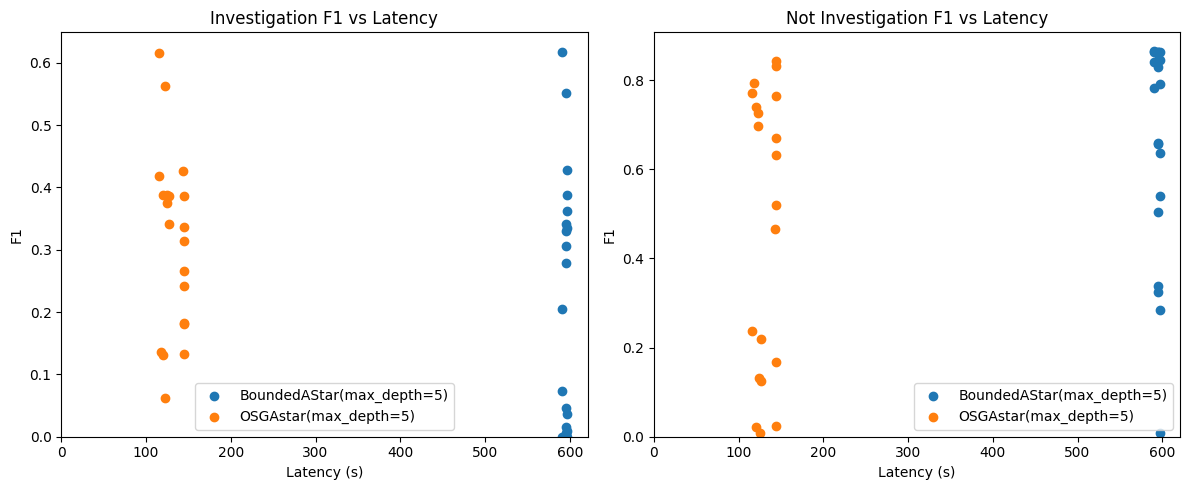

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for strategy, programs in data["strategies"].items():
    lats = [p["latency"] for p in programs]
    inv = [p["investigation_f1"] for p in programs]
    ni = [p["not_investigation_f1"] for p in programs]
    axes[0].scatter(lats, inv, label=strategy)
    axes[1].scatter(lats, ni, label=strategy)

axes[0].set_xlabel("Latency (s)")
axes[0].set_ylabel("F1")
axes[0].set_title("Investigation F1 vs Latency")
axes[0].legend()

axes[1].set_xlabel("Latency (s)")
axes[1].set_ylabel("F1")
axes[1].set_title("Not Investigation F1 vs Latency")
axes[1].legend()

for ax in axes:
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.set_xlim(0, ax.get_xlim()[1])

fig.tight_layout()
plt.show()